# Linear Regression

In [19]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

**Linear regression** is a supervised method.

\begin{equation}
 f: X \rightarrow y \nonumber
\end{equation}

## Data sets

In what follows we will use 2 data sets:

* a synthetic data set
* the Diabetes Data set from *Efron et al.* (2004)

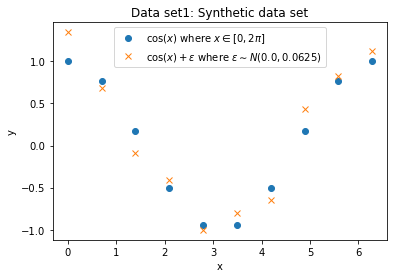

In [17]:
# DATA SET 1:               
MEAN=0.0
SD=0.25 # Sigma^2=0.0625
SZ=10
x=np.linspace(0.0, 2.0*np.pi, num=SZ)
rnd.seed(seed=2505) # To make data reproducible
noise=rnd.normal(loc=MEAN, scale=SD, size=SZ)
y1=np.cos(x) 
y=y1 + noise

plt.plot(x,y1,'o',label=r'$\cos(x)$ where $x \in [0,2\pi]$')
plt.plot(x,y,'x',label=r'$\cos(x)+\epsilon$ where $ \epsilon \sim N(0.0,0.0625)$ ')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(r'Data set1: Synthetic data set')
plt.show()


## Optimization of a given model

Let's consider the following linear model:
\begin{eqnarray}
 Y_i & = & \sum_{i=0}^n X_i \, \beta_i \, + \, \epsilon_i \nonumber 
\end{eqnarray}

or in matrix form:
\begin{eqnarray}
 Y   & = & X\, \beta \, + \, \epsilon \nonumber 
\end{eqnarray}
where $X$ (design matrix) is an $n \times p$ matrix.
(In what follows, we assume that $n \ge p$).

This model can be optimized in several ways:
* LSQ
* Gradient Descent

### LSQ-method

If the design matrix $X$ has rank $p$, then $X^TX$ is positive-definite and 
thus non-singular.

The estimate for $\beta$ i.e. $\widehat{\beta}$ is **unique** and thus given by:
\begin{eqnarray}
   \widehat{\beta} & = & (X^TX)^{-1}\,X^T \,Y \nonumber
\end{eqnarray}

The fitted values $\widehat{Y}$ are given by:
\begin{eqnarray}
   \widehat{Y} & = & X \,  \widehat{\beta} \nonumber
\end{eqnarray}

The residuals $e$ are given by:
\begin{eqnarray}
   e & = & Y\, - \, \widehat{Y}  \nonumber \\
     & = & Y\, - \, X \,  \widehat{\beta} \nonumber
\end{eqnarray}

The **residual sums of squares** (RSS) is thus:
\begin{eqnarray}
   e^T\,e &= & Y^TY \, - \, \widehat{\beta}^T  X^T X \widehat{\beta} \nonumber
\end{eqnarray}

The **mean square error** (MSE) is then given by:
\begin{eqnarray}
    \mathrm{MSE} & = & \frac{\mathrm{RSS}}{n} \nonumber
\end{eqnarray}

In [46]:
def genXmat(x,orderPoly,hasIntercept=True):
    """
    Create X matrix based on:
      orderPoly:: order of the polynomial
      hasIntercept :: presence of Intercept
    """
    start=0
    if hasIntercept==False:
        start=1
    return x[:,np.newaxis]**np.arange(start, orderPoly+1)

def calcBetaHat(Xmat,Y):
    """
    Calculate BetaHat
    """
    return la.inv(Xmat.T @ Xmat) @ Xmat.T @ Y

def calcYHat(Xmat,BetaHat):
    """
    Calculate YHat
    """
    return Xmat @ BetaHat

def calcResid(Y,YHat):
    """
    Calculate Residual
    """
    return Y - YHat


MAXORDER=x.shape[0]
print(f" Max. PolyOrder:{MAXORDER}")

lstIorder, lstRSS = [], []
for iorder in range(1, MAXORDER):
    lstIorder.append(iorder)
    print(f"  Order:{iorder}")
    Xmat = genXmat(x,iorder)
    #print(f" X:\n{Xmat}")
    
    BetaHat = calcBetaHat(Xmat,y)
    #print(f"    BetaHat:\n      {BetaHat}")
    
    YHat= calcYHat(Xmat,BetaHat)
    #print(f" YHat:\n{YHat}")
    
    Res = calcResi d(y,YHat)
    #print(f" Resid:\n{Res}")
    
    RSS = sum(Res * Res)
    lstRSS.append(RSS)
    print(f"    RSS:\n      {RSS:8.4f}")    

 Max. PolyOrder:10
  Order:1
    RSS:
        6.4160
  Order:2
    RSS:
        0.5446
  Order:3
    RSS:
        0.4750
  Order:4
    RSS:
        0.1553
  Order:5
    RSS:
        0.1312
  Order:6
    RSS:
        0.1229
  Order:7
    RSS:
        0.0819
  Order:8
    RSS:
        0.0790
  Order:9
    RSS:
        0.0002


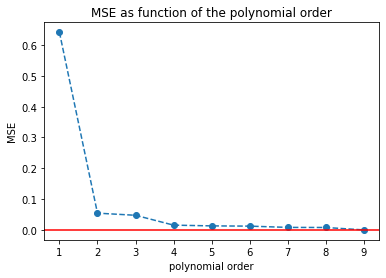

In [63]:
plt.plot(np.array(lstIorder), np.array(lstRSS)/x.shape[0],'o--')
plt.axhline(y=0.0, color='r',linestyle='-')
plt.title(r'MSE as function of the polynomial order')
plt.xlabel('polynomial order')
plt.ylabel('MSE')
plt.show()

### Gradient Descent

## Finding the optimal model

Issue of overfitting and underfitting.